In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_train_target = pd.read_csv('./Data/training_set_labels.csv')
df_train_data = pd.read_csv('./Data/training_set_values.csv')

In [5]:
# profile2.to_notebook_iframe()

Need to write out my reasoning as to why I collapsed the categories this way.

In [6]:
# Change the name of the status_group in df_train_target 'functional needs repair' to 'non-functional'
# Also change the name of 'non functional' to non-functional
df_train_target['status_group'] = df_train_target['status_group'].replace('functional needs repair', 'non functional')
df_train_target['status_group'] = df_train_target['status_group'].replace('non functional', 'non-functional')

# Check
df_train_target['status_group'].value_counts()

functional        32259
non-functional    27141
Name: status_group, dtype: int64

In [7]:
# encode status_group as 0, 1
df_train_target['status_group'] = df_train_target['status_group'].astype('category')
df_train_target['status_group'] = df_train_target['status_group'].cat.codes
df_train_target['status_group'].value_counts(normalize=True)

0    0.543081
1    0.456919
Name: status_group, dtype: float64

IMPORTANT - IS MY MODEL PREDICTING 1?

In [8]:
# split df_train_data into numeric and categorical
df_train_data_numeric = df_train_data.select_dtypes(include=['int64', 'float64'])
df_train_data_categorical = df_train_data.select_dtypes(include=['object'])

In [9]:
# Are there any nulls in the numeric data?
df_train_data_numeric.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [10]:
# print out information on df_train_data_categorical
df_train_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date_recorded          59400 non-null  object
 1   funder                 55765 non-null  object
 2   installer              55745 non-null  object
 3   wpt_name               59400 non-null  object
 4   basin                  59400 non-null  object
 5   subvillage             59029 non-null  object
 6   region                 59400 non-null  object
 7   lga                    59400 non-null  object
 8   ward                   59400 non-null  object
 9   public_meeting         56066 non-null  object
 10  recorded_by            59400 non-null  object
 11  scheme_management      55523 non-null  object
 12  scheme_name            31234 non-null  object
 13  permit                 56344 non-null  object
 14  extraction_type        59400 non-null  object
 15  extraction_type_gro

In [11]:
df_train_data_categorical.head().T

,0,1,2,3,4
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria
subvillage,Mnyusi B,Nyamara,Majengo,Mahakamani,Kyanyamisa
region,Iringa,Mara,Manyara,Mtwara,Kagera
lga,Ludewa,Serengeti,Simanjiro,Nanyumbu,Karagwe
ward,Mundindi,Natta,Ngorika,Nanyumbu,Nyakasimbi
public_meeting,True,NaN,True,True,True


Let's start chucking things out.

First, let's get a sense of how many nulls there are. 

I don't think there are any in the numeric dataset.

I'm going to remove:

date recorded
funder
installer
wpt_name
recorded_by
scheme_management
scheme_name

In [12]:
# What is the number of columns in df_train_data_categorical?
df_train_data_categorical.shape[1]

30

In [13]:
# Drop date recorded, funder, installer, wpt_name, recorded_by, scheme_management, scheme_name
df_train_data_categorical = df_train_data_categorical.drop(['date_recorded', 'funder', 'installer', 'wpt_name', 'recorded_by', 'scheme_management', 'scheme_name'], axis=1)

# Check
df_train_data_categorical.head().T

,0,1,2,3,4
basin,Lake Nyasa,Lake Victoria,Pangani,Ruvuma / Southern Coast,Lake Victoria
subvillage,Mnyusi B,Nyamara,Majengo,Mahakamani,Kyanyamisa
region,Iringa,Mara,Manyara,Mtwara,Kagera
lga,Ludewa,Serengeti,Simanjiro,Nanyumbu,Karagwe
ward,Mundindi,Natta,Ngorika,Nanyumbu,Nyakasimbi
public_meeting,True,NaN,True,True,True
permit,False,True,True,True,True
extraction_type,gravity,gravity,gravity,submersible,gravity
extraction_type_group,gravity,gravity,gravity,submersible,gravity
extraction_type_class,gravity,gravity,gravity,submersible,gravity


In [14]:
# How many nulls are in categorical?
df_train_data_categorical.isnull().sum()

# How many unique values are in each column?
# df_train_data_categorical.nunique()

basin                       0
subvillage                371
region                      0
lga                         0
ward                        0
public_meeting           3334
permit                   3056
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
dtype: int64

In [15]:
# Drop everything with nulls in it
df_train_data_categorical = df_train_data_categorical.dropna(axis=1)

In [16]:
# df_train_data_categorical = df_train_data_categorical.columns.str.lower().str.replace(' ', '_')
# df_train_data_categorical

# # import column transformer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.pipeline import Pipeline


# # lowercase everything in df_train_data_categorical using the ColumnTransformer
# ct = ColumnTransformer(transformers=[
#     ('lowercase', LowercaseTransformer(), df_train_data_categorical)
#     ('remove_spaces', RemoveSpacesTransformer(), df_train_data_categorical)],
#     remainder='passthrough')

In [17]:
# How many columns did we have originally?
print('Number of columns in original df_train_data: ', len(df_train_data.columns))

Number of columns in original df_train_data:  40


Gonna chuck everything in and see what I get.

Yeah this is going to take a while.

In [18]:
# Encode the categorical data
df_train_data_categorical = pd.get_dummies(df_train_data_categorical)

In [19]:
# standardize the numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_data_numeric_scaled = scaler.fit_transform(df_train_data_numeric)

# convert the scaled numerical data into a dataframe
df_train_data_numeric_scaled = pd.DataFrame(df_train_data_numeric_scaled, columns=df_train_data_numeric.columns)

# combine the scaled numerical data with the categorical data
df_train_data = pd.concat([df_train_data_numeric_scaled, df_train_data_categorical], axis=1)

# Check
df_train_data.head().T

,0,1,2,3,4
id,1.512933,-1.320990,-0.130757,1.427676,-0.810478
amount_tsh,1.895665,-0.105970,-0.097630,-0.105970,-0.105970
gps_height,1.041252,1.054237,0.025541,-0.584751,-0.964200
longitude,0.131052,0.094610,0.515158,0.671308,-0.448669
latitude,-1.408791,1.207934,0.639751,-1.849720,1.317271
...,...,...,...,...,...
waterpoint_type_group_communal standpipe,1.000000,1.000000,1.000000,1.000000,1.000000
waterpoint_type_group_dam,0.000000,0.000000,0.000000,0.000000,0.000000
waterpoint_type_group_hand pump,0.000000,0.000000,0.000000,0.000000,0.000000
waterpoint_type_group_improved spring,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
# Let's make sure none of the original categorical variables are left over
df_train_data.select_dtypes(include=['object']).columns

Index([], dtype='object')

And now we have 66181 columns. 

Insayian. 

Here I'm going to make my dummy classifier

In [21]:
# Take what I have and split it into train and test and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_data, df_train_target['status_group'], test_size=0.2, random_state=42)

# Check
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

# The sum of the rows is
print('Sum of rows: ', X_train.shape[0] + X_test.shape[0])

# The sum of the rows is the same as the number of rows in the original data

X_train shape:  (47520, 2383)
X_test shape:  (11880, 2383)
y_train shape:  (47520,)
y_test shape:  (11880,)
Sum of rows:  59400


In [22]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a baseline model
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

# Make predictions
y_pred = dummy.predict(X_test)

# Evaluate performance
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))

Accuracy score:  0.5435185185185185
Precision score:  0.0
Recall score:  0.0
F1 score:  0.0


c:\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Feed into logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.79


Probably a lot easier to just do a baseline with the most common.

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      6457
           1       0.80      0.71      0.75      5423

    accuracy                           0.79     11880
   macro avg       0.79      0.78      0.78     11880
weighted avg       0.79      0.79      0.78     11880

[[5491  966]
 [1584 3839]]


<AxesSubplot:>

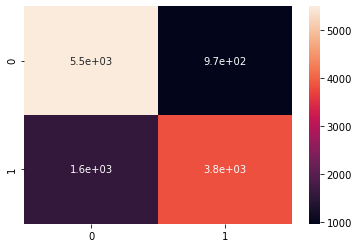

In [24]:
# print out metrics for my model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)


In [25]:
# perform cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

# use average of cross-validation scores as estimate of out-of-sample accuracy
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Cross-Validation Accuracy Scores [0.78577441 0.78240741 0.78577441 0.78188131 0.78061869]
Average cross-validation score: 0.78


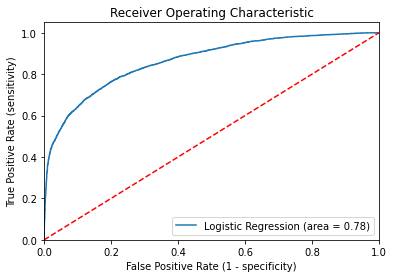

In [26]:
# make an auc roc curve comparing the baseline model to the logistic regression model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# calculate roc curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

# plot roc curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

Feature: 0, Score: 0.01547
Feature: 1, Score: -0.08622
Feature: 2, Score: 0.00823
Feature: 3, Score: 0.12881
Feature: 4, Score: 0.16030
Feature: 5, Score: 0.00346
Feature: 6, Score: 0.19319
Feature: 7, Score: -0.09240
Feature: 8, Score: -0.12698
Feature: 9, Score: 0.02097
Feature: 10, Score: -0.18223
Feature: 11, Score: -0.22045
Feature: 12, Score: -0.02518
Feature: 13, Score: -0.02223
Feature: 14, Score: -0.40500
Feature: 15, Score: 0.14247
Feature: 16, Score: 0.09855
Feature: 17, Score: 0.21203
Feature: 18, Score: 0.40864
Feature: 19, Score: -0.43611
Feature: 20, Score: -0.12160
Feature: 21, Score: -0.51815
Feature: 22, Score: -0.76524
Feature: 23, Score: 0.49397
Feature: 24, Score: 0.49929
Feature: 25, Score: 0.00787
Feature: 26, Score: 0.25364
Feature: 27, Score: -0.20609
Feature: 28, Score: 0.81901
Feature: 29, Score: 0.39783
Feature: 30, Score: -0.28042
Feature: 31, Score: 0.05996
Feature: 32, Score: -0.18523
Feature: 33, Score: 0.00148
Feature: 34, Score: 0.35138
Feature: 35, Sc

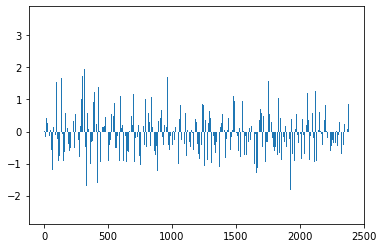

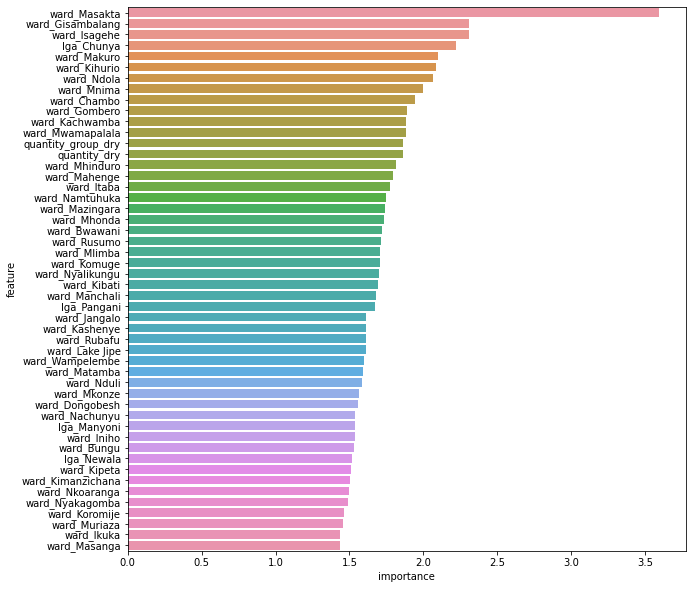

In [27]:
# show me feature importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# sort feature importance
sorted(zip(importance, X_train.columns), reverse=True)

# graph sorted feature importance
importance_sorted = sorted(zip(importance, X_train.columns), reverse=True)
importance_sorted = pd.DataFrame(importance_sorted, columns=['importance', 'feature'])
importance_sorted.head()
plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='feature', data=importance_sorted.head(50))
plt.show()

Okay, now I've made two models.

One probability

and one with everything and the kitchen sink

Now let's go deeper into the features like I needed to before.

Also need to fix up

- validation and split
- pipelines, workflow for the model